In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

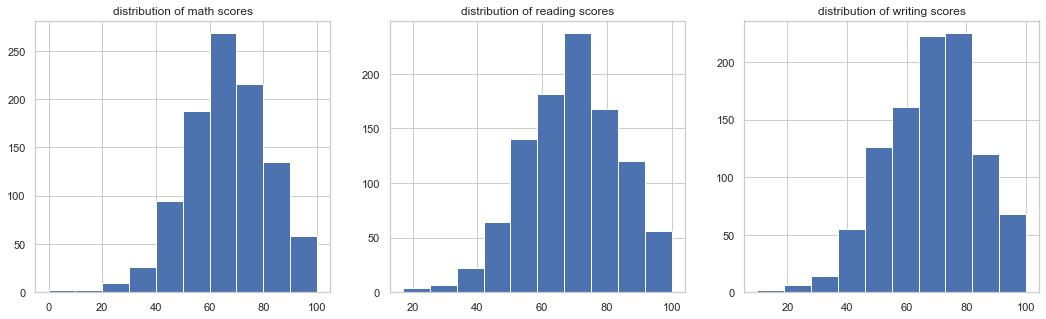

In [36]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(df["math score"])
plt.title("distribution of math scores")

plt.subplot(1,3,2)
plt.hist(df["reading score"])
plt.title("distribution of reading scores")

plt.subplot(1,3,3)
plt.hist(df["writing score"])
plt.title("distribution of writing scores")

plt.show()

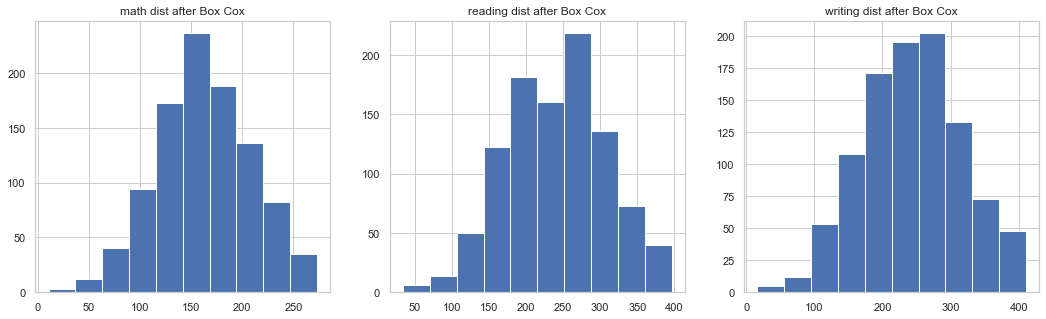

In [39]:
math_boxcox,_ = boxcox(df[df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(df["reading score"])
writing_boxcox,_ = boxcox(df["writing score"])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(math_boxcox)
plt.title("math dist after Box Cox")

plt.subplot(1,3,2)
plt.hist(reading_boxcox)
plt.title("reading dist after Box Cox")

plt.subplot(1,3,3)
plt.hist(writing_boxcox)
plt.title("writing dist after Box Cox")

plt.show()

# Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

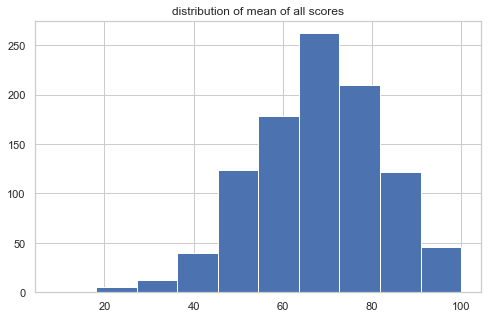

In [31]:
df['weighted_average'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
#df.weighted_average

plt.figure(figsize=(8,5))

plt.hist(df["weighted_average"])
plt.title("distribution of mean of all scores")

plt.show()

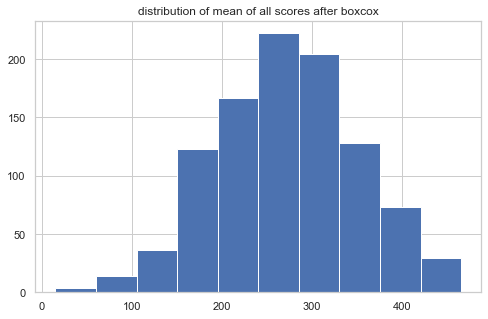

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [40]:
weighted_average_boxcox,_ = boxcox(df['weighted_average'])

plt.figure(figsize=(8,5))

plt.hist(weighted_average_boxcox)
plt.title("distribution of mean of all scores after boxcox")

plt.show()

jb_stats = jarque_bera(df['weighted_average'])
norm_stats = normaltest(df['weighted_average'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

# Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

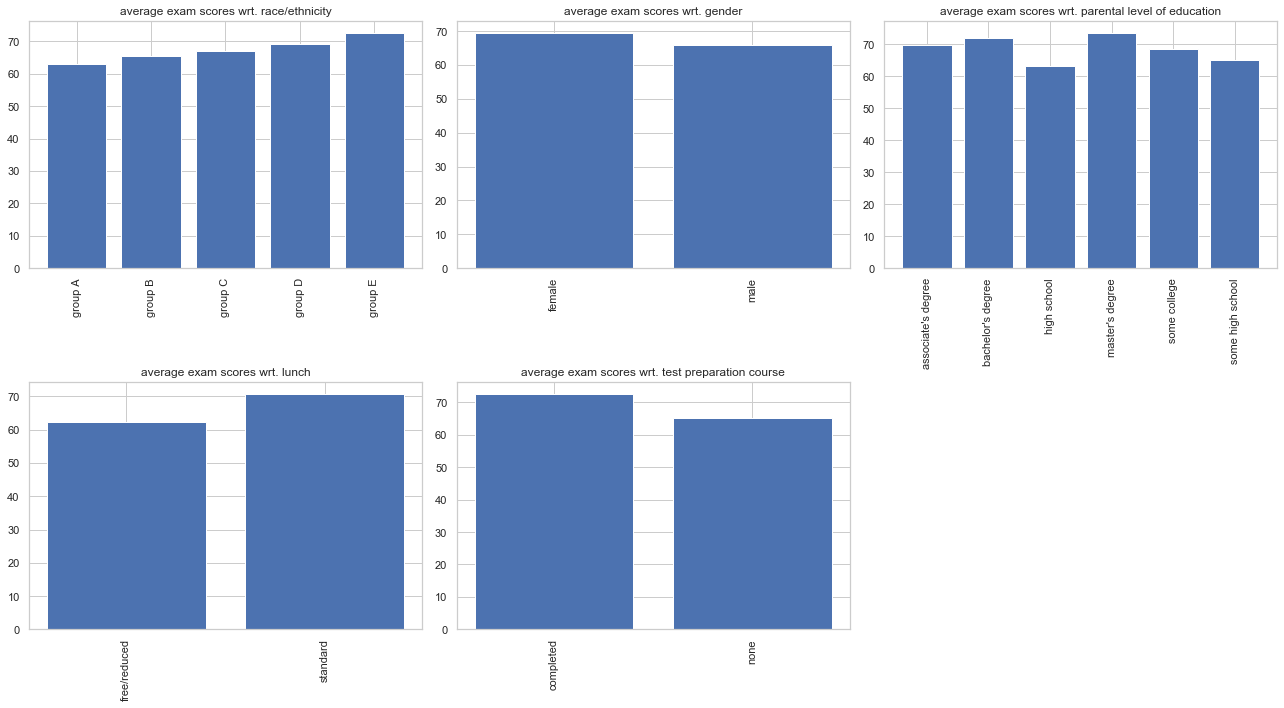

In [41]:
df["exam_score"] = df['weighted_average']

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(df.groupby("race/ethnicity")
        ["exam_score"].mean().index, df.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(df.groupby("gender")
        ["exam_score"].mean().index, df.groupby("gender")["exam_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(df.groupby("parental level of education")
        ["exam_score"].mean().index, df.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(df.groupby("lunch")
        ["exam_score"].mean().index, df.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(df.groupby("test preparation course")
        ["exam_score"].mean().index, df.groupby("test preparation course")["exam_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()